# Inclusão de Bibliotecas

In [57]:
from os import listdir # Biblioteca responsável por capturar informações de arquivos dentro de um diretório.

import os 

import pathlib

import numpy as np # Cálculos numéricos

import pandas as pd # Criação e manipulação de dataframes.

import seaborn as sns # Biblioteca para plotar diversos tipos de gráficos.

import matplotlib.pyplot as plt # Biblitoeca para plotar gráficos.

import wave # Biblioteca com métodos que permitam converter dados raw em .wav

import struct # Biblioteca responsável por trabalhar com dados raw.

import librosa # A python package for music and audio analysis.

import librosa.display # librosa package visualization.

import random # Random functions.

# Pré Processamento
from sklearn.preprocessing import LabelEncoder

# Split do dataset em treino e teste
from sklearn.model_selection import train_test_split, cross_validate, LeaveOneOut

# Aplicação de PCA no dataset.
from sklearn.decomposition import PCA

# Algoritmo de Regressão Logística
from sklearn.linear_model import LogisticRegression

#Algoritmo de SVM
from sklearn.svm import SVC

#Algoritmo de Decision Tree
from sklearn.tree import DecisionTreeClassifier


# Métricas de erro para validação do modelo gerado. 
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix


pd.set_option('display.max_rows', None) # Mostra todas as linhas do dataframe.
pd.set_option('display.max_columns', None) # Mostra todas as colunas do dataframe.


In [2]:
%matplotlib inline

# Funções para Criação do Dataframe

In [3]:
####### Funções necessárias para gerar o dataset conforme o status da marcha e profile_id: ###########

def findCSV_filename(path_to_dir, suffix = ".csv"):
    """
    Retorna todos os arquivos com extensão .csv em uma lista. 
    Os elementos são ordenados em ordem crescente.
    """
    
    # Lista os arquivos no diretório path_to_dir 
    filenames = listdir(path_to_dir) 
    
    # Retorna uma lista com os arquivos com final .csv em ordem crescente baseado no nome do arquivo.
    return sorted([filename for filename in filenames if filename.endswith( suffix )])

# Separa todos os arquivos .csv em listas diferentes conforme a categoria da marcha.
def FormatScreeningFilenames(filenames):
    """
    Separa todos os arquivos .csv em listas diferentes conforme a categoria da marcha.
    """
    
    MS_filenames = [] # Lista da categoria "Marcha Soldado"
    MN_filenames = [] # Lsta da categoria "Marcha Normal"
    MM_filenames = [] # Lista da categoria "Marcha Mancando"
    MP_filenames = [] # Lista da categoria "Marcha a Definir"

    
    # Lista os arquivos no diretório path_to_dir
    for filename in filenames:
        
        if (filename.find("MS", 4, 6) != -1): # Se encontrar "MS" no nome do arquivo:
            MS_filenames.append(filename) # Gera lista com todos os "MS" .csv
            
            # Incrementa numeração de acordo com o número do último arquivo
            lastMS_fileNumber = int(findCSV_filename("/home/trs/Gait_Project/GaitDataset/Triagem/MS")[-1][:4])+1
            
            
        elif (filename.find("MN", 4, 6) != -1): # Se encontrar "MN" no nome do arquivo:
            MN_filenames.append(filename) # Gera lista com todos os "MN" .csv
            
            # Incrementa numeração de acordo com o número do último arquivo na pasta MN
            lastMN_fileNumber = int(findCSV_filename("/home/trs/Gait_Project/GaitDataset/Triagem/MN")[-1][:4])+1
            
        elif (filename.find("MM", 4, 6) != -1): # Se encontrar "MM" no nome do arquivo:
            MM_filenames.append(filename) # Gera lista com todos os "MM" .csv
            
            # Incrementa numeração de acordo com o número do último arquivo na pasta MM
            lastMM_fileNumber = int(findCSV_filename("/home/trs/Gait_Project/GaitDataset/Triagem/MM")[-1][:4])+1
             
        else: # Se encontrar "MP" no nome do arquivo:
            MP_filenames.append(filename) # Gera lista com todos os "MP" .csv
            
            # Incrementa numeração de acordo com o número do último arquivo na pasta MD
            lastMP_fileNumber = int(findCSV_filename("/home/trs/Gait_Project/GaitDataset/Triagem/MP")[-1][:4])+1
            
    

    for filename in MS_filenames: 
        
        # Move os arquivos MM para a pasta de destino MS.
        os.rename("/home/trs/Gait_Project/GaitDataset/Triagem/{}".format(filename),
                  "/home/trs/Gait_Project/GaitDataset/Triagem/{}".format('{:0>4}'.format(lastMS_fileNumber)
                                                                       +filename[4:]))
        lastMS_fileNumber+=1 
        
    
    for filename in MM_filenames:
        
        # Move os arquivos MM para a pasta de destino MM.
        os.replace("/home/trs/Gait_Project/GaitDataset/Triagem/{}".format(filename),
                  "/home/trs/Gait_Project/GaitDataset/Triagem/MM/{}".format('{:0>4}'.format(lastMM_fileNumber)
                                                                       +filename[4:]))
        lastMM_fileNumber+=1
    
    for filename in MN_filenames:
        
        # Move os arquivos MN para a pasta de destino MN.
        os.replace("/home/trs/Gait_Project/GaitDataset/Triagem/{}".format(filename),
                  "/home/trs/Gait_Project/GaitDataset/Triagem/MN/{}".format('{:0>4}'.format(lastMN_fileNumber)
                                                                       +filename[4:]))
        lastMN_fileNumber+=1
        
    for filename in MP_filenames:
        
        # Move os arquivos MP para a pasta de destino MP.
        os.replace("/home/trs/Gait_Project/GaitDataset/Triagem/{}".format(filename),
                  "/home/trs/Gait_Project/GaitDataset/Triagem/MP/{}".format('{:0>4}'.format(lastMP_fileNumber)
                                                                       +filename[4:]))
        lastMP_fileNumber+=1
            
        


def getProfile_id(filenames):
    """
    Retorna uma lista que contém o profile_id de todos os arquivos com extensão .csv
    """
    
    profile_id=[]
    
    for item in filenames: # Para cada arquivo na lista filenames,
        
        for i in range(500): # Dentro de cada arquivo, faça 500 vezes:
            
            profile_id.append(item[:4]) #Pega os 4 primeiros caracteres e armazena na lista profile_id.
            
    return profile_id 


def getGait_status(filenames):
    """
    Retorna uma lista com o status da marcha de cada profile_id diferente.  
    """
    
    gaitStatus=[]

    for item in filenames: # Para cada arquivo na lista filenames,
        
        for i in range(500): # Dentro de cada arquivo, faça 500 vezes:
            
            gaitStatus.append(item[4:6]) # Pega o quinto caractere e armazena na lista gaitStatus.
            
    return gaitStatus


def createDataframe(filenames):
    """
    Cria um dataframe vertical com todos os arquivos .csv dados na lista filenames.
    """

    i = 1
    
    df = pd.read_csv(filenames[0]) # Inicializa o dataframe com o primeiro arquivo .csv da lista filenames.
    
    while i < len(filenames): # Percorre toda a lista filenames.
        
        df_temporary = pd.read_csv(filenames[i]) # Cria um dataframe temporario.
        
        df = pd.concat([df,df_temporary]).reset_index(drop=True) # Concatena no dataframe o dataframe temporário. 
        
        i += 1
        
    return(df)

 
def insertColumns(df, gaitStatus, profile_id):
    """
    Insere as colunas 'Gait_Status' e 'Profile_ID' no dataframe vertical.
    """
    
    df['Gait_Status'] = gaitStatus # Passa todos os elementos, com respectiva ordem, para a coluna especificada.
    
    df['Profile_ID'] = profile_id  # Passa todos os elementos, com respectiva ordem, para a coluna especificada.
    
    return df


def createHorizontalDataframe(df, filenames):
    """
    Cria um Dataframe horizontal com base no dataframe vertical.
    """
    
    profile_id=[]
    
    for item in filenames: # Para cada item na lista filenames: 
        profile_id.append(item[:4]) # Pega os 4 primeiros caracteres e armazena numa lista profile_id.

    gaitStatus=[]
    for item in filenames: # Para cada item na lista filenames:
        gaitStatus.append(item[4:6]) # Pega o quinto caractere e armazena numa lista gaitStatus


    xac = []
    for i in range(500): # Faça 500 vezes: 
        xac.append("Xac{:0>3}".format(i)) # xac = [ Xac000, Xac001, ... , Xacc499]
    yac = []
    for i in range(500): # Faça 500 vezes: 
        yac.append("Yac{:0>3}".format(i)) # yac = [ Yac000, Yac001, ... , Yacc499]
    zac = []
    for i in range(500):
        zac.append("Zac{:0>3}".format(i))
        
    xang = []
    for i in range(500):
        xang.append("RotX{:0>3}".format(i))
        
    yang = []
    for i in range(500):
        yang.append("RotY{:0>3}".format(i))
        
    zang = []
    for i in range(500):
        zang.append("RotZ{:0>3}".format(i))
        
    tempo = []
    for i in range(500):
        tempo.append("Tempo{:0>3}".format(i))
        
    columns_label = [xac,yac,zac,xang,yang,zang,tempo]
    
    columns_df = []
    
    columns_df.append('profile_ID') # Acrescenta a coluna 'profile_ID'
    columns_df.append('Gait Status') # Acrescenta a coluna 'Gait Status'

    for item in columns_label: # Para cada coluna,
        for i in range(500): # Faça 500 vezes
            columns_df.append(item[i]) # Ao final, temos uma lista com todos as colunas rotuladas adequadamente.

    columns_labelstring = ['xac','yac','zac','xang','yang','zang','tempo']
    
    
    

    df_horizontal = pd.DataFrame(columns = columns_df) # Cria as colunas do dataframe com a correta rotulação.
    
    count_concat = 0
    
    j = 0
    
    k = 500
    while count_concat < len(filenames): # Enquanto não concatenar todos os arquivos da lista filenames,
        vetorzao = []
        vetorzao.append(profile_id[count_concat]) # Pega o ID dentro da lista profile_id.
        
        vetorzao.append(gaitStatus[count_concat]) # Pega o estado da marcha dentro da lista gaitStatus.

        for s in range(len(columns_labelstring)): # Percorre todo a lista columns_labelstring.
            
            for i in range(j, k): 
                vetorzao.append(dataframe['{}'.format(columns_labelstring[s])][i])    
        df_horizontalbuffer = pd.DataFrame([vetorzao], columns = columns_df)
        df_horizontal = pd.concat([df_horizontal,df_horizontalbuffer]).reset_index(drop=True)
        j += 500
        k += 500
        count_concat += 1
    return df_horizontal


In [4]:
filenames = findCSV_filename("/home/trs/Gait_Project/GaitDataset/Triagem")
FormatScreeningFilenames(filenames)

        
        


# Criação do Dataframe Vertical

In [4]:
filenames = findCSV_filename("/home/trs/Gait_Project/GaitDataset/Triagem/full_Dataset")

gaitStatus = getGait_status(filenames)

profile_id = getProfile_id(filenames)

dataframe = createDataframe(filenames)



In [5]:
dataframe.shape

(336000, 8)

In [6]:
dataframe = insertColumns(dataframe,gaitStatus,profile_id)


In [7]:
dataframe.head()

,xac,yac,zac,xang,yang,zang,tempo,amostra,Gait_Status,Profile_ID
0,-702,-1478,9018,-894,215,1752,1,0,MM,0001
1,-68,-1829,9071,-925,186,1822,7377,1,MM,0001
2,910,-2249,9155,-947,166,1874,17226,2,MM,0001
3,1703,-2587,9460,-964,180,1902,27396,3,MM,0001
4,1896,-3158,9593,-967,224,1921,37314,4,MM,0001


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336000 entries, 0 to 335999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   xac          336000 non-null  int64 
 1   yac          336000 non-null  int64 
 2   zac          336000 non-null  int64 
 3   xang         336000 non-null  int64 
 4   yang         336000 non-null  int64 
 5   zang         336000 non-null  int64 
 6   tempo        336000 non-null  int64 
 7   amostra      336000 non-null  int64 
 8   Gait_Status  336000 non-null  object
 9   Profile_ID   336000 non-null  object
dtypes: int64(8), object(2)
memory usage: 25.6+ MB


# Criação do Dataframe Horizontal

In [9]:
df= createHorizontalDataframe(dataframe, filenames)

In [10]:
df.head()

profile_ID Gait Status Xac000 Xac001 Xac002 Xac003 Xac004 Xac005 Xac006  \
0       0001          MM   -702    -68    910   1703   1896   1764   1891   
1       0001          MN  -3581  -4655  -3121  -1726   -216   1781   1607   
2       0001          MP  -5418  -4456  -4391  -3160   -943    144   -802   
3       0001          MS  10608   9584   9256   9384   9868   9701  10049   
4       0002          MM    381    494    348    658    605    529    568   

  Xac007 Xac008 Xac009 Xac010 Xac011 Xac012 Xac013 Xac014 Xac015 Xac016  \
0   2102   2127   2507   2820   3043   3202   3116   3154   3684   3623   
1   -273  -1382  -1475  -1618  -1746  -1859  -1791  -1672  -1342   -949   
2   -189   1239   2138   2355   1216   1757   2944   3764   2239  -1264   
3  10253  10193  10196  10167  10035   9021   8960   8332  -6195  28394   
4   1064    896    247    338    384    518   1237   1415   1684   1463   

  Xac017  Xac018 Xac019 Xac020 Xac021 Xac022  Xac023  Xac024 Xac025 Xac026  \
0   5383    6687   7671   8700   9988  10665   10693   11149  11636  10034   
1   -935    -885   -288   -606     72   1135     714     991   1497   1554   
2  -1487    -990   2916   3915   3050   4347    6872   10110  11748  13050   
3  28766  -22716   7324  29498  24645  -8979  -25836  -21115  -4268   5394   
4   1356    1250   1208   1495   2286   2408    2742    1869    573   -384   

  Xac027  Xac028  Xac029 Xac030 Xac031 Xac032  Xac033 Xac034 Xac035 Xac036  \
0  -7287  -26909  -19601   5958   8969   -942   -4681   1704   5704   4495   
1   2632    2448    2319   2289   2145   2083    2292   1997   1550   1747   
2  12057   11569   11397  11986  11661  11445   11741  12129  11734  11478   
3   5907    3365    2691   -386  -3566  -4766   -4024  -2564  -1418   -944   
4    657     865    -789  -2978  -5740  -8395  -10432  -9845  -2107   9999   

  Xac037 Xac038 Xac039 Xac040 Xac041 Xac042  Xac043 Xac044 Xac045  Xac046  \
0   1310    166   -896  -2227  -1675     48     706   -229  -1506   -1402   
1   1686   1764   1643   1218   1228   1450    1729   1765   2302    2233   
2  10937  10481   9934   9393   8952   8655    7897   6427   4218    2166   
3   -273   1042    969   -524  -2886  -4227   -3537  -2720   -656     699   
4   9889   7824   9652  10055   3393  -3674  -11796  -9270  -7188  -10351   

  Xac047 Xac048 Xac049 Xac050 Xac051 Xac052 Xac053 Xac054  Xac055  Xac056  \
0   -489   -181   -261    -22    106   -300    -54    -11     191     387   
1   1916   2128   2795   2686   1743   2024   1860   -668   -2069   -3099   
2   1498   1001    634    349    284    305    210   -198  -11240  -32176   
3    542   -241    480    843    198   -170   -245   -377    -214    -300   
4  -9514  -7574  -6060  -4189  -2603  -1967  -2028  -1770   -1172    -474   

   Xac057  Xac058 Xac059  Xac060 Xac061  Xac062  Xac063  Xac064 Xac065 Xac066  \
0     780    1137    828     902    843     605     601     469    575    898   
1   -5204   -9375  -9698   -4032   8704   10506    6388    4405   1555    102   
2  -31907  -19306   8925  -31448  23943  -15386  -21317  -12340   -325  10043   
3    -180    -100    477     602     42      -8     717    1536   1695   1608   
4     220     705    920    1918   3060    3233    2848    2241   2163   2066   

  Xac067 Xac068 Xac069 Xac070 Xac071 Xac072 Xac073 Xac074 Xac075 Xac076  \
0   1207   1609   1770   1831   1604   1462   1568   1847   2120   2332   
1    832    928    749   3690   8169   3806   1072    595    322   -839   
2  14078   6413   -205   -485    848    143  -1921  -2841    324   3955   
3   1910   2351   2178   2731   3659   3642   2526    952   1215   1165   
4   2680   3358   3233   3212   2975   4234   7044  10045  12417  13960   

  Xac077 Xac078 Xac079 Xac080 Xac081 Xac082 Xac083 Xac084 Xac085 Xac086  \
0   2325   2463   2239   2088   1834   2127   2607   2656   2761   2739   
1  -1494  -2619  -2728  -1505   -780   -199    374    908   1080   1019   
2   3968   2312    575   -249   -100   -561   -631    257   1

In [11]:
# Transformar a feature categórica 'Gait Status' em resposta binária. Normal = 1 -> I = 0 e vice-versa.
df_with_dummies = pd.get_dummies(df, columns= ['Gait Status'], prefix = 'Gait_Status', drop_first= True)
df_with_dummies.head()


profile_ID Xac000 Xac001 Xac002 Xac003 Xac004 Xac005 Xac006 Xac007 Xac008  \
0       0001   -702    -68    910   1703   1896   1764   1891   2102   2127   
1       0001  -3581  -4655  -3121  -1726   -216   1781   1607   -273  -1382   
2       0001  -5418  -4456  -4391  -3160   -943    144   -802   -189   1239   
3       0001  10608   9584   9256   9384   9868   9701  10049  10253  10193   
4       0002    381    494    348    658    605    529    568   1064    896   

  Xac009 Xac010 Xac011 Xac012 Xac013 Xac014 Xac015 Xac016 Xac017  Xac018  \
0   2507   2820   3043   3202   3116   3154   3684   3623   5383    6687   
1  -1475  -1618  -1746  -1859  -1791  -1672  -1342   -949   -935    -885   
2   2138   2355   1216   1757   2944   3764   2239  -1264  -1487    -990   
3  10196  10167  10035   9021   8960   8332  -6195  28394  28766  -22716   
4    247    338    384    518   1237   1415   1684   1463   1356    1250   

  Xac019 Xac020 Xac021 Xac022  Xac023  Xac024 Xac025 Xac026 Xac027  Xac028  \
0   7671   8700   9988  10665   10693   11149  11636  10034  -7287  -26909   
1   -288   -606     72   1135     714     991   1497   1554   2632    2448   
2   2916   3915   3050   4347    6872   10110  11748  13050  12057   11569   
3   7324  29498  24645  -8979  -25836  -21115  -4268   5394   5907    3365   
4   1208   1495   2286   2408    2742    1869    573   -384    657     865   

   Xac029 Xac030 Xac031 Xac032  Xac033 Xac034 Xac035 Xac036 Xac037 Xac038  \
0  -19601   5958   8969   -942   -4681   1704   5704   4495   1310    166   
1    2319   2289   2145   2083    2292   1997   1550   1747   1686   1764   
2   11397  11986  11661  11445   11741  12129  11734  11478  10937  10481   
3    2691   -386  -3566  -4766   -4024  -2564  -1418   -944   -273   1042   
4    -789  -2978  -5740  -8395  -10432  -9845  -2107   9999   9889   7824   

  Xac039 Xac040 Xac041 Xac042  Xac043 Xac044 Xac045  Xac046 Xac047 Xac048  \
0   -896  -2227  -1675     48     706   -229  -1506   -1402   -489   -181   
1   1643   1218   1228   1450    1729   1765   2302    2233   1916   2128   
2   9934   9393   8952   8655    7897   6427   4218    2166   1498   1001   
3    969   -524  -2886  -4227   -3537  -2720   -656     699    542   -241   
4   9652  10055   3393  -3674  -11796  -9270  -7188  -10351  -9514  -7574   

  Xac049 Xac050 Xac051 Xac052 Xac053 Xac054  Xac055  Xac056  Xac057  Xac058  \
0   -261    -22    106   -300    -54    -11     191     387     780    1137   
1   2795   2686   1743   2024   1860   -668   -2069   -3099   -5204   -9375   
2    634    349    284    305    210   -198  -11240  -32176  -31907  -19306   
3    480    843    198   -170   -245   -377    -214    -300    -180    -100   
4  -6060  -4189  -2603  -1967  -2028  -1770   -1172    -474     220     705   

  Xac059  Xac060 Xac061  Xac062  Xac063  Xac064 Xac065 Xac066 Xac067 Xac068  \
0    828     902    843     605     601     469    575    898   1207   1609   
1  -9698   -4032   8704   10506    6388    4405   1555    102    832    928   
2   8925  -31448  23943  -15386  -21317  -12340   -325  10043  14078   6413   
3    477     602     42      -8     717    1536   1695   1608   1910   2351   
4    920    1918   3060    3233    2848    2241   2163   2066   2680   3358   

  Xac069 Xac070 Xac071 Xac072 Xac073 Xac074 Xac075 Xac076 Xac077 Xac078  \
0   1770   1831   1604   1462   1568   1847   2120   2332   2325   2463   
1    749   3690   8169   3806   1072    595    322   -839  -1494  -2619   
2   -205   -485    848    143  -1921  -2841    324   3955   3968   2312   
3   2178   2731   3659   3642   2526    952   1215   1165   2523   3759   
4   3233   3212   2975   4234   7044  10045  12417  13960  14359  16142   

  Xac079 Xac080 Xac081 Xac082 Xac083 Xac084 Xac085 Xac086 Xac087  Xac088  \
0   2239   2088   1834   2127   2607   2656   2761   2739   2734    2566   
1  -2728  -1505   -780   -199    374    908   1080   1019   1141    1556   
2    575   -249   -100   -561   -631    257   

In [12]:
tempo_drop = df_with_dummies.loc[:,'Tempo000':'Tempo499']

df_for_modeling= df_with_dummies.drop(['profile_ID', 'Gait_Status_MN', 'Gait_Status_MS', 'Gait_Status_MP'],
                         axis = 1) # Elimina as feature 'profile_ID' e Gait_Status_N

df_for_modeling = df_for_modeling.drop(tempo_drop, axis = 1) # Elimina as features de step time.

df_for_modeling.head()  # df_pca contém apenas os atributos agora



Xac000 Xac001 Xac002 Xac003 Xac004 Xac005 Xac006 Xac007 Xac008 Xac009  \
0   -702    -68    910   1703   1896   1764   1891   2102   2127   2507   
1  -3581  -4655  -3121  -1726   -216   1781   1607   -273  -1382  -1475   
2  -5418  -4456  -4391  -3160   -943    144   -802   -189   1239   2138   
3  10608   9584   9256   9384   9868   9701  10049  10253  10193  10196   
4    381    494    348    658    605    529    568   1064    896    247   

  Xac010 Xac011 Xac012 Xac013 Xac014 Xac015 Xac016 Xac017  Xac018 Xac019  \
0   2820   3043   3202   3116   3154   3684   3623   5383    6687   7671   
1  -1618  -1746  -1859  -1791  -1672  -1342   -949   -935    -885   -288   
2   2355   1216   1757   2944   3764   2239  -1264  -1487    -990   2916   
3  10167  10035   9021   8960   8332  -6195  28394  28766  -22716   7324   
4    338    384    518   1237   1415   1684   1463   1356    1250   1208   

  Xac020 Xac021 Xac022  Xac023  Xac024 Xac025 Xac026 Xac027  Xac028  Xac029  \
0   8700   9988  10665   10693   11149  11636  10034  -7287  -26909  -19601   
1   -606     72   1135     714     991   1497   1554   2632    2448    2319   
2   3915   3050   4347    6872   10110  11748  13050  12057   11569   11397   
3  29498  24645  -8979  -25836  -21115  -4268   5394   5907    3365    2691   
4   1495   2286   2408    2742    1869    573   -384    657     865    -789   

  Xac030 Xac031 Xac032  Xac033 Xac034 Xac035 Xac036 Xac037 Xac038 Xac039  \
0   5958   8969   -942   -4681   1704   5704   4495   1310    166   -896   
1   2289   2145   2083    2292   1997   1550   1747   1686   1764   1643   
2  11986  11661  11445   11741  12129  11734  11478  10937  10481   9934   
3   -386  -3566  -4766   -4024  -2564  -1418   -944   -273   1042    969   
4  -2978  -5740  -8395  -10432  -9845  -2107   9999   9889   7824   9652   

  Xac040 Xac041 Xac042  Xac043 Xac044 Xac045  Xac046 Xac047 Xac048 Xac049  \
0  -2227  -1675     48     706   -229  -1506   -1402   -489   -181   -261   
1   1218   1228   1450    1729   1765   2302    2233   1916   2128   2795   
2   9393   8952   8655    7897   6427   4218    2166   1498   1001    634   
3   -524  -2886  -4227   -3537  -2720   -656     699    542   -241    480   
4  10055   3393  -3674  -11796  -9270  -7188  -10351  -9514  -7574  -6060   

  Xac050 Xac051 Xac052 Xac053 Xac054  Xac055  Xac056  Xac057  Xac058 Xac059  \
0    -22    106   -300    -54    -11     191     387     780    1137    828   
1   2686   1743   2024   1860   -668   -2069   -3099   -5204   -9375  -9698   
2    349    284    305    210   -198  -11240  -32176  -31907  -19306   8925   
3    843    198   -170   -245   -377    -214    -300    -180    -100    477   
4  -4189  -2603  -1967  -2028  -1770   -1172    -474     220     705    920   

   Xac060 Xac061  Xac062  Xac063  Xac064 Xac065 Xac066 Xac067 Xac068 Xac069  \
0     902    843     605     601     469    575    898   1207   1609   1770   
1   -4032   8704   10506    6388    4405   1555    102    832    928    749   
2  -31448  23943  -15386  -21317  -12340   -325  10043  14078   6413   -205   
3     602     42      -8     717    1536   1695   1608   1910   2351   2178   
4    1918   3060    3233    2848    2241   2163   2066   2680   3358   3233   

  Xac070 Xac071 Xac072 Xac073 Xac074 Xac075 Xac076 Xac077 Xac078 Xac079  \
0   1831   1604   1462   1568   1847   2120   2332   2325   2463   2239   
1   3690   8169   3806   1072    595    322   -839  -1494  -2619  -2728   
2   -485    848    143  -1921  -2841    324   3955   3968   2312    575   
3   2731   3659   3642   2526    952   1215   1165   2523   3759   3853   
4   3212   2975   4234   7044  10045  12417  13960  14359  16142  18539   

  Xac080 Xac081 Xac082 Xac083 Xac084 Xac085 Xac086 Xac087  Xac088 Xac089  \
0   2088   1834   2127   2607   2656   2761   2739   2734    2566   2609   
1  -1505   -780   -199    374    908   1080   1019   1141    1556   2620   
2   -249   -100   -561   -631    257   1367   1721   1374     303   -3

# Transformar Dados Raw em Arquivo de Aúdio WAV
### Procedimentos
1. Serão gerados 6 novos arquivos .wav a partir de cada data point do dataset atual. Esses novos arquivos são referentes aos eixos X,Y e Z do acelerômetro e giroscópio.


In [13]:
teste = (list(df.loc[0, 'Xac000':'RotZ499'].values)) 
len(teste)



3000

In [14]:
def getRandID():
    """
    Retorna um profile_ID aleatório
    """
    
    profile_ID = list(df_horizontal['profile_ID']) # Coloca todos os profile_ID do dataframe em uma lista.

    # Retorna aleatoriamente UM elemento da lista profile_ID, converte para um inteiro e armazena na variável Rand_ID.
    Rand_ID = int(random.choice(profile_ID)) 
    
    return Rand_ID

# Retorna o status da marcha respectivo ao profile_ID aleatório gerado.
def getRandGaitStatus(Rand_ID):
    """
    Retorna o status da marcha respectivo ao profile_ID aleatório gerado.
    """

    # Rand_ID representa a LINHA, 1 representa a COLUNA de Gait_Status.
    Rand_GaitStatus = df_horizontal.iloc[Rand_ID-1, 1] # O -1 é para pegar a correta indexação do elemento na lista.
    
    return Rand_GaitStatus
    
    


In [15]:
def raw_toWav(df):
    """
    Para cada instância do dataframe, gera 6 arquivos .wav referentes a cada eixo (X,Y,Z) do giroscópio
    e acelerômetro. Preserva o mesmo nome do arquivo .csv, acrescentando a especificação do eixo (X, Y ou Z).
    Pendências:
    - Descobrir qual eixo (X, Y ou Z) é referente ao sentido da caminhada (indo ou voltando)
    - Após essa informação, normalizar esse eixo, pois o sentido, ir ou vir, é irrelevante para detecção de anomalias.
    - Será que é mesmo irrelevante ? 
    """
    
                        #################### Procedimento para Eixo X #################
    # Gera um arquivo .wav para escrita com o nome especificado
    for currentIndex in range(len(df)):
        
        obj = wave.open('//home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/six_InOne/{:0>3}{}.wav'.format(
        df['profile_ID'][currentIndex], df['Gait Status'][currentIndex]), 'wb')
        
        obj.setnchannels(1) # Set the number of channels. 1 for Mono, 2 for stereo channels.
        obj.setsampwidth(2) # Set the sample width to n bytes.
        obj.setframerate(100) # Set the frame rate to n. (Fs = 100 Hz)
        obj.setnframes(30) #Set the number of  frames to n
        
        bufferList = list(df.loc[currentIndex, 'Xac000':'RotZ499'].values)
        
        for value in bufferList:
            data = struct.pack('<h', value)
            
            
            obj.writeframesraw (data) # Write audio frames, without correcting.
            
        obj.close() # Close the file if it was opened by wave.
        

In [17]:
raw_toWav(df)

In [14]:
# Função para gerar 3 arquivos .wav (eixo x, y e z dos dados do acelerômetro) de uma pessoa
# aleatória específica com marcha NORMAL.
    
# Esta função deverá retornar uma lista com 6 elementos no seguinte formato:
# wav_gait = [0001Xacc_N.wav,0001Yacc_N.wav, 0001Zacc_N.wav]
def get_NWavFiles():
    # Fs = 100 Hz
    # Duração 5 segundos
    
    Rand_ID = getRandID () # Captura um profile_ID aleatório.
    Rand_GaitStatus = getRandGaitStatus(Rand_ID) # Captura o estado da marcha relativo ao profile_ID aleatório.


    while (Rand_GaitStatus != 'N'):
        Rand_ID = getRandID ()
        Rand_GaitStatus = getRandGaitStatus(Rand_ID)
    

    if (Rand_GaitStatus == 'N'):

                            #################### Procedimento para Eixo X #################

        # Cria uma arquivo do tipo.wav para escrita com o nome fornecido.
        obj = wave.open('/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/Xacc{0}_{1}.wav'.format
                                                                                (Rand_ID, Rand_GaitStatus), 'wb')
        obj.setnchannels(1) #Set the number of channels. 1 for Mono 2 for stereo channels
        obj.setsampwidth(2) # Set the sample width to n bytes.
        obj.setframerate(100) # Set the frame rate to n. (Fs = 100 Hz)
        obj.setnframes(5) #Set the number of frames to n.

        # Retorna uma lista com todos os valores de aceleração do eixo X.
        Acc_AxisX= list(df.loc[Rand_ID-1, 'Xac000':'Xac499'].values)

        # Transformar os dados raw em dados binários através da biblioteca struct.
        for value in Acc_AxisX:
           
            data = struct.pack('<h', value) # '<' representa um parâmetro de alinhamento e h significa short int.
                                            # Aqui short tem um tamanho de 2 bytes e abrange todo o range dos dados
                                            #coletados. '>' é o "numbers in little-endian C layout"

            obj.writeframesraw( data ) # Write audio frames, without correcting.

        obj.close() # Close the file if it was opened by wave.
        
                        #################### Procedimento para Eixo Y #################
            
        # Cria uma arquivo do tipo.wav para escrita com o nome fornecido.
        obj = wave.open('/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/Yacc{0}_{1}.wav'.format
                                                                                (Rand_ID, Rand_GaitStatus), 'wb')
        obj.setnchannels(1) #Set the number of channels. 1 for Mono 2 for stereo channels
        obj.setsampwidth(2) # Set the sample width to n bytes.
        obj.setframerate(100) # Set the frame rate to n. (Fs = 100 Hz)
        obj.setnframes(5) #Set the number of frames to n.

        # Retorna uma lista com todos os valores de aceleração do eixo X.
        Acc_AxisY= list(df_horizontal.loc[Rand_ID-1, 'Yac000':'Yac499'].values)

        # Transformar os dados raw em dados binários através da biblioteca struct.
        for value in Acc_AxisY:

            data = struct.pack('<h', value) # '<' representa um parâmetro de alinhamento e h significa short int.
                                            # Aqui short tem um tamanho de 2 bytes e abrange todo o range dos dados
                                            #coletados. '>' é o "numbers in little-endian C layout"

            obj.writeframesraw( data ) # Write audio frames, without correcting.

        obj.close() # Close the file if it was opened by wave.

                        #################### Procedimento para Eixo Z #################

        # Cria uma arquivo do tipo.wav para escrita com o nome fornecido.
        obj = wave.open('/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/Zacc{0}_{1}.wav'.format
                                                                                (Rand_ID, Rand_GaitStatus), 'wb')
        obj.setnchannels(1) #Set the number of channels. 1 for Mono 2 for stereo channels
        obj.setsampwidth(2) # Set the sample width to n bytes.
        obj.setframerate(100) # Set the frame rate to n. (Fs = 100 Hz)
        obj.setnframes(5) #Set the number of frames to n.

        # Retorna uma lista com todos os valores de aceleração do eixo X.
        Acc_AxisZ= list(df_horizontal.loc[Rand_ID-1, 'Zac000':'Zac499'].values)

        # Transformar os dados raw em dados binários através da biblioteca struct.
        for value in Acc_AxisZ:

            data = struct.pack('<h', value) # '<' representa um parâmetro de alinhamento e h significa short int.
                                            # Aqui short tem um tamanho de 2 bytes e abrange todo o range dos dados
                                            #coletados. '>' é o "numbers in little-endian C layout"

            obj.writeframesraw( data ) # Write audio frames, without correcting.

        obj.close() # Close the file if it was opened by wave.
        
        
        

        return ['Xacc{0}_{1}.wav'.format(Rand_ID, Rand_GaitStatus),
                'Yacc{0}_{1}.wav'.format(Rand_ID, Rand_GaitStatus),
                'Zacc{0}_{1}.wav'.format(Rand_ID, Rand_GaitStatus)]






    #Próximas implementações:
    # -> 1.Ajustar para que o normal e irregular se refiram ao mesmo indivíduo.
    # -> 2. As comparações de plots devem ser sempre com os mesmos eixos respectivos: x-x , y-y, z-z da aceleração.
    # -> 3. Função que me permita apagar todos os arquivos .wav gerados.


In [15]:
# Função para gerar 3 arquivos .wav (eixo x, y e z dos dados do acelerômetro) de uma pessoa
# aleatória específica com marcha IRREGULAR.
    
# Esta função deverá retornar uma lista com 6 elementos no seguinte formato:
# wav_gait = [0005Xacc_I.wav, 0005Yacc_I.wav, 0005Zacc_I.wav]
def get_IWavFiles():
    # Fs = 100 Hz
    # Duração 5 segundos
    
    Rand_ID = getRandID () # Captura um profile_ID aleatório.
    Rand_GaitStatus = getRandGaitStatus(Rand_ID) # Captura o estado da marcha relativo ao profile_ID aleatório.


    while (Rand_GaitStatus != 'I'):
        Rand_ID = getRandID ()
        Rand_GaitStatus = getRandGaitStatus(Rand_ID)
    

    if (Rand_GaitStatus == 'I'):

                            #################### Procedimento para Eixo X #################

        # Cria uma arquivo do tipo.wav para escrita com o nome fornecido.
        obj = wave.open('/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/Xacc{0}_{1}.wav'.format
                                                                                (Rand_ID, Rand_GaitStatus), 'wb')
        obj.setnchannels(1) #Set the number of channels. 1 for Mono 2 for stereo channels
        obj.setsampwidth(2) # Set the sample width to n bytes.
        obj.setframerate(100) # Set the frame rate to n. (Fs = 100 Hz)
        obj.setnframes(5) #Set the number of frames to n.

        # Retorna uma lista com todos os valores de aceleração do eixo X.
        Acc_AxisX= list(df_horizontal.loc[Rand_ID-1, 'Xac000':'Xac499'].values)

        # Transformar os dados raw em dados binários através da biblioteca struct.
        for value in Acc_AxisX:
           
            data = struct.pack('<h', value) # '<' representa um parâmetro de alinhamento e h significa short int.
                                            # Aqui short tem um tamanho de 2 bytes e abrange todo o range dos dados
                                            #coletados. '>' é o "numbers in little-endian C layout"

            obj.writeframesraw( data ) # Write audio frames, without correcting.

        obj.close() # Close the file if it was opened by wave.
        
                        #################### Procedimento para Eixo Y #################
            
        # Cria uma arquivo do tipo.wav para escrita com o nome fornecido.
        obj = wave.open('/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/Yacc{0}_{1}.wav'.format
                                                                                (Rand_ID, Rand_GaitStatus), 'wb')
        obj.setnchannels(1) #Set the number of channels. 1 for Mono 2 for stereo channels
        obj.setsampwidth(2) # Set the sample width to n bytes.
        obj.setframerate(100) # Set the frame rate to n. (Fs = 100 Hz)
        obj.setnframes(5) #Set the number of frames to n.

        # Retorna uma lista com todos os valores de aceleração do eixo X.
        Acc_AxisY= list(df_horizontal.loc[Rand_ID-1, 'Yac000':'Yac499'].values)

        # Transformar os dados raw em dados binários através da biblioteca struct.
        for value in Acc_AxisY:

            data = struct.pack('<h', value) # '<' representa um parâmetro de alinhamento e h significa short int.
                                            # Aqui short tem um tamanho de 2 bytes e abrange todo o range dos dados
                                            #coletados. '>' é o "numbers in little-endian C layout"

            obj.writeframesraw( data ) # Write audio frames, without correcting.

        obj.close() # Close the file if it was opened by wave.

                        #################### Procedimento para Eixo Z #################

        # Cria uma arquivo do tipo.wav para escrita com o nome fornecido.
        obj = wave.open('/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/Zacc{0}_{1}.wav'.format
                                                                                (Rand_ID, Rand_GaitStatus), 'wb')
        obj.setnchannels(1) #Set the number of channels. 1 for Mono 2 for stereo channels
        obj.setsampwidth(2) # Set the sample width to n bytes.
        obj.setframerate(100) # Set the frame rate to n. (Fs = 100 Hz)
        obj.setnframes(5) #Set the number of frames to n.

        # Retorna uma lista com todos os valores de aceleração do eixo X.
        Acc_AxisZ= list(df_horizontal.loc[Rand_ID-1, 'Zac000':'Zac499'].values)

        # Transformar os dados raw em dados binários através da biblioteca struct.
        for value in Acc_AxisZ:

            data = struct.pack('<h', value) # '<' representa um parâmetro de alinhamento e h significa short int.
                                            # Aqui short tem um tamanho de 2 bytes e abrange todo o range dos dados
                                            #coletados. '>' é o "numbers in little-endian C layout"

            obj.writeframesraw( data ) # Write audio frames, without correcting.

        obj.close() # Close the file if it was opened by wave.
        
        
        

        return ['Xacc{0}_{1}.wav'.format(Rand_ID, Rand_GaitStatus),
                'Yacc{0}_{1}.wav'.format(Rand_ID, Rand_GaitStatus),
                'Zacc{0}_{1}.wav'.format(Rand_ID, Rand_GaitStatus)]






    #Próximas implementações:
    # -> 1.Ajustar para que o normal e irregular se refiram ao mesmo indivíduo.
    # -> 2. As comparações de plots devem ser sempre com os mesmos eixos respectivos: x-x , y-y, z-z da aceleração.
    # -> 3. Função que me permita apagar todos os arquivos .wav gerados.

In [16]:
get_IWavFiles()

['Xacc83_I.wav', 'Yacc83_I.wav', 'Zacc83_I.wav']

# Geração de Imagens a partir de Aúdio

Considerações:

1. Análise dinâmica da densidade espectral de energia. Essa densidade pode ser visualizada pela distribuição de cores em um gráfico da Frequência vs Tempo que representam, na verdade, uma distribuição de potência/amplitude do sinal ao longo do Eixo X e Y.

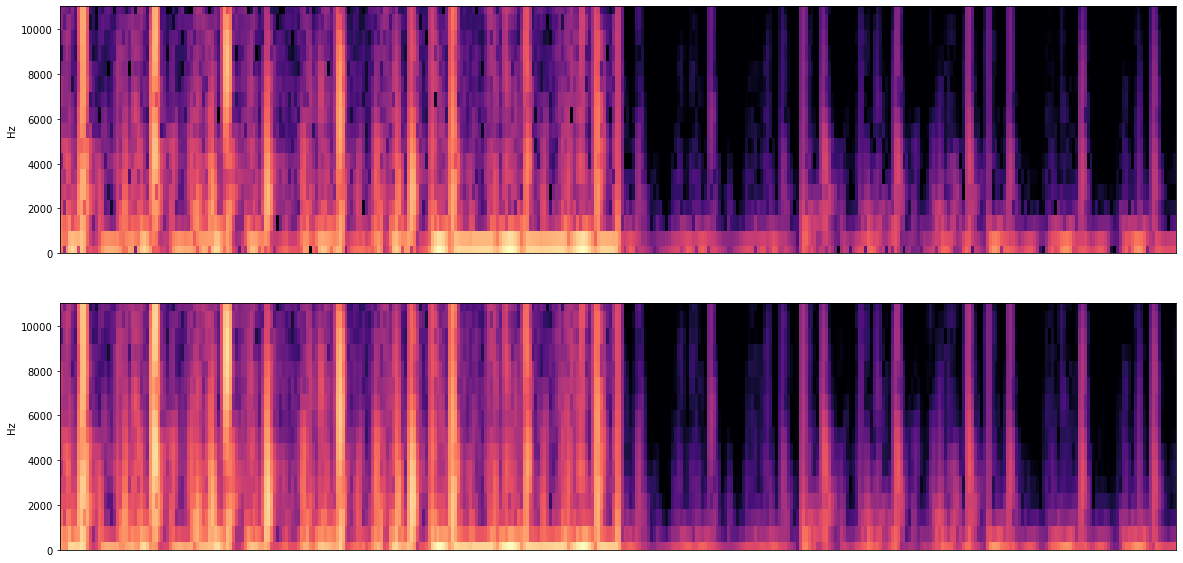

In [55]:
e_file1 = '/home/trs/Gait_Project/GaitDataset/Triagem/wavFiles/six_InOne/0001MP.wav'
y, sr = librosa.load(e_file1, mono=True, sr = 100, duration =30)
D = librosa.stft(y, n_fft=32, window='hann')
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max), y_axis='linear')#log
plt.subplot(2,1,2)
S = librosa.feature.melspectrogram(S=np.abs(D),sr=sr, n_mels= 16)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='linear')
#librosa.display.specshow(S, y_axis='linear')

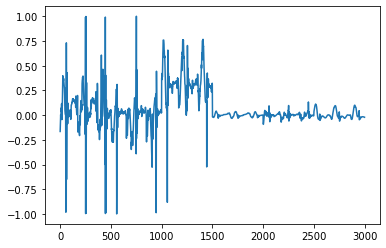

In [56]:
plt.plot(y)

In [ ]:
#Gera imagens para os sons
cmap = plt.get_cmap('inferno')

#plt.figure(figsize=(10,10))
gait_types = 'MM MS MN MP'.split()
for gait in gait_types:
    pathlib.Path(f'/home/trs/Gait_Project/GaitDataset/Triagem/img_data/{gait}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/home/trs/Gait_Project/GaitDataset/Triagem/{gait}'):
        gait_name = f'/home/trs/Gait_Project/GaitDataset/Triagem/{gait}/{filename}'
        y, sr = librosa.load(gait_name, mono=True, sr = 100, duration =30)#
        #plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
        #ou
        #D = librosa.stft(y)
        D = librosa.stft(y, n_fft=32, window='hann')
        librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max), y_axis='linear')#log
        #ou
        #S = librosa.feature.melspectrogram(S=np.abs(D),sr=sr, n_mels=64)
        #S = np.log(S+0.01) nao
        #librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='log')
        #librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='linear')#linear ou log
        plt.axis('off');
        plt.savefig(f'/home/trs/Gait_Project/GaitDataset/Triagem/img_data/{gait}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

# Ler algumas amostras de Aúdio

In [17]:
sr = 16000
e_file1 = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/gait_X.wav'

# 5 segundos de amostragem
y1, sr = librosa.load(e_file1, mono=True, sr=sr, offset=0, duration=5)

/home/trs/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/gait_X.wav'

## Escutar a amostra de Aúdio

In [ ]:
from IPython.display import Audio, IFrame, display

display(Audio(y1,rate=sr))

##### O aúdio acima representa a geração de um arquivo .wav a partir de dados raw do acelerômetro no eixo X. Foram tomadas 500 amostras em um intervalo de aproximadamente = 5 segundos para formar esse arquivo em formato de aúdio .wav

# Etapa X.x.x: Comparação entre as curvas de resposta


In [ ]:
P1WavAccN = get_NWavFiles()
P2WavAccN = get_NWavFiles()
    

P1WavAccI = get_IWavFiles()
P2WavAccI = get_IWavFiles()

sr = 16000

### Comparação da marcha normal entre dois indivíduos referentes à aceleração ao longo do eixo x.


In [ ]:
P1WavAccN_X = P1WavAccN[0]
P2WavAccN_X = P2WavAccN[0]


P1wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P1WavAccN_X)
P2wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P2WavAccN_X)

In [ ]:
# 5 segundos de amostragem
P1WavAccN_X, sr = librosa.load(P1wav_path, mono=True, sr=sr, offset=0, duration=5)
P2WavAccN_X, sr = librosa.load(P2wav_path, mono=True, sr=sr, offset=0, duration=5)


In [ ]:
librosa.display.waveplot(P1WavAccN_X,sr=sr,x_axis='time')


In [ ]:
librosa.display.waveplot(P2WavAccN_X,sr=sr,x_axis='time')


### Comparação da marcha normal entre dois indivíduos referentes à aceleração ao longo do eixo y.


In [ ]:
P1WavAccN_Y = P1WavAccN[1]
P2WavAccN_Y = P2WavAccN[1]


P1wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P1WavAccN_Y)
P2wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P2WavAccN_Y)

In [ ]:
# 5 segundos de amostragem
P1WavAccN_Y, sr = librosa.load(P1wav_path, mono=True, sr=sr, offset=0, duration=5)
P2WavAccN_Y, sr = librosa.load(P2wav_path, mono=True, sr=sr, offset=0, duration=5)

In [ ]:
librosa.display.waveplot(P1WavAccN_Y,sr=sr,x_axis='time')

In [ ]:
librosa.display.waveplot(P2WavAccN_Y,sr=sr,x_axis='time')


### Comparação da marcha normal entre dois indivíduos referentes à aceleração ao longo do eixo z.


In [ ]:
P1WavAccN_Z = P1WavAccN[2]
P2WavAccN_Z = P2WavAccN[2]


P1wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P1WavAccN_Z)
P2wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P2WavAccN_Z)
print(P1WavAccN_Z, P1wav_path)

In [ ]:
# 5 segundos de amostragem
P1WavAccN_Z, sr = librosa.load(P1wav_path, mono=True, sr=sr, offset=0, duration=5)
P2WavAccN_Z, sr = librosa.load(P2wav_path, mono=True, sr=sr, offset=0, duration=5)

In [ ]:
librosa.display.waveplot(P1WavAccN_Z,sr=sr,x_axis='time')

In [ ]:
librosa.display.waveplot(P2WavAccN_Z,sr=sr,x_axis='time')


### Comparação da marcha normal entre dois indivíduos referentes à aceleração ao longo do eixo x.


In [ ]:
P1WavAccI_X = P1WavAccI[0]
P2WavAccI_X = P2WavAccI[0]


P1wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P1WavAccI_X)
P2wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P2WavAccI_X)
print(P1WavAccI_X, P1wav_path,P2wav_path)

In [ ]:
# 5 segundos de amostragem
P1WavAccI_X, sr = librosa.load(P1wav_path, mono=True, sr=sr, offset=0, duration=5)
P2WavAccI_X, sr = librosa.load(P2wav_path, mono=True, sr=sr, offset=0, duration=5)

In [ ]:
librosa.display.waveplot(P1WavAccI_X,sr=sr,x_axis='time')

In [ ]:
librosa.display.waveplot(P2WavAccI_X,sr=sr,x_axis='time')


### Comparação da marcha normal entre dois indivíduos referentes à aceleração ao longo do eixo x.


In [ ]:
P1WavAccN_X = P1WavAccN[0]
P2WavAccI_X = P2WavAccI[0]


P1wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P1WavAccN_X)
P2wav_path = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/RandWavFiles/{}'.format(P2WavAccI_X)
print(P1wav_path,P2wav_path)

In [ ]:
# 5 segundos de amostragem
P1WavAccN_X, sr = librosa.load(P1wav_path, mono=True, sr=sr, offset=0, duration=5)
P2WavAccI_X, sr = librosa.load(P2wav_path, mono=True, sr=sr, offset=0, duration=5)

In [ ]:
librosa.display.waveplot(P1WavAccN_X,sr=sr,x_axis='time')

In [ ]:
librosa.display.waveplot(P2WavAccI_X,sr=sr,x_axis='time')


##### O plot acima ilustra  bem o que é possível observar pela audição: em intervalos de tempos parecidos, um pico ( uma vibração forte) é possível de se escutar.

## Etapa 4.1.2: Logmel Espectograma

In [ ]:
S1 = librosa.feature.melspectrogram(y=y1, sr=sr, n_mels=64)
D1 = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(D1, x_axis = 'time', y_axis='mel')

# [Pré Processamento] Escala dos Dados


In [22]:
# StandardScaler: Essa técnica na prática ignora a forma de distribuição e transforma o dado para forma com média
# próxima de zero e um desvio padrão próximo a um, ou seja, assume que não temos valores discrepantes nos dados
# e normaliza tudo.
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Objeto para fazer a re-escala dos dados. Aqui ainda é um "recipiente" para os dados.
scaler = MinMaxScaler();

In [24]:
# Os dados das features do dataframe df são reestruturados a partir do chamada do método fit no objeto scaler.
# Aqui ainda não ocorre a transformação, mas sim uma "preparação" para a transformação.
scaler.fit(df_for_modeling)

MinMaxScaler()

In [28]:
# Aqui os dados das colunas passadas no scaler.fit(df) sofrem uma tansformação. Os dados  possuem escalas ajustadas
# de modo  a prepará-los para executar um modelo de ML. 
scaled_data = scaler.transform(df_for_modeling)

# dataframe_teste = pd.DataFrame(scaled_data)
# dataframe_teste.head()

# [Pré Processamento] Redução com PCA
#### Redução de Dimensionalidade aplicando PCA

In [29]:
# Cria um objeto que servirá de "recipiente" para os dados "scaled_data".
# Observa-se que o número de componentes principais setado foi  = 60 (10 para cada eixo. Total 6*10).

# Preciso coletar mais dados, pois o n_components máximo é igual ao mínimo entre min(n_samples, n_features)=30.
pca = PCA(n_components=50)

# n_components entre 30 - 40 melhora significamente o algoritmo SVM com escala MinMaxScaler;
# Os outros modelos não atendem bem nessas configurações. Acurácia: 69%

# O melhor modelo encontrado até agora foi com DecisionTree não passando pelo processo de escala dos dados e 
# com n_components = 3. Acurácia: 72% - 74%

# Att 18/11/2020 : Melhor modelo encontrado até agora foi com SVM passando pelo StandarScaler e n_components >= 15. 
# Acurácia: 74% - 78%

In [30]:
# Dimensiona o objeto "recipiente" pca para os dados da variável scaled_data
#pca.fit(df_pca)
pca.fit(scaled_data)

######## AJUSTAR PARA df_pca OU scaled_data ... TESTAR ############

PCA(n_components=50)

In [31]:
# Apply the rotation in dimensionality reduction by calling transform
#x_pca = pca.transform(df_pca) 
df_with_pca = pca.transform(scaled_data)

In [32]:
scaled_data.shape # Dados padronizados antes da transformação PCA

(672, 3000)

In [33]:
df_with_pca.shape # Dados padronizados apenas com 30 features após a transformação PCA

(672, 50)

In [34]:
# Dataframe que representa o dataset original através da redução de dimensionalidades de 3000 features para 30.
df_PCA = pd.DataFrame(df_with_pca) 
df_PCA.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-1.121147,0.446394,0.590996,0.248876,-1.369808,-0.083375,-0.359336,3.267548,0.202920,-0.219050,1.310635,-1.867638,0.887616,1.329021,0.894476,-1.302300,-1.264184,1.644995,0.689625,0.148969,0.802709,0.581982,0.176393,-0.570871,-0.087324,0.381714,0.281510,0.190307,0.205745,0.836995,-0.478041,-0.206573,-0.430539,0.511944,0.301047,0.986162,-0.351479,0.436315,-0.757961,-0.385105,-0.042992,0.069723,0.204064,-0.412075,-0.088167,0.464686,-0.089593,-0.683371,0.028349,0.901827
1,0.652219,-1.493936,-0.882238,-0.858638,-0.209863,-2.355528,4.027328,-2.583988,-0.611908,0.350581,-1.610738,2.752071,-0.129510,-0.247786,-0.739572,-1.322588,-1.430457,1.998797,-0.226252,0.466125,0.168030,-0.445853,1.223973,0.232196,-0.193328,0.945256,0.087012,-0.536978,-0.376226,-0.226109,0.051847,-0.660544,-0.360272,0.138445,-0.312240,0.518785,-0.265417,-0.214714,-0.368198,-0.025153,-0.637896,1.691566,1.119187,-0.510810,-0.666474,-0.204262,0.821062,0.469857,0.277210,0.661869
2,0.060416,0.171656,0.855483,-0.535627,-0.755931,-0.112547,0.663769,-1.767804,0.627483,0.730840,2.207903,-1.135637,-1.710276,-0.818636,0.787891,0.018267,-0.906218,0.236616,0.169425,-0.835669,1.409198,-0.890583,-0.831299,-0.187585,0.138842,-0.428617,-1.077398,-0.038345,-0.348587,-0.425431,-0.590786,0.014449,0.809807,-0.325642,0.831963,-0.894061,0.230742,0.533074,-0.221243,-0.278989,-0.420329,-0.563903,-0.452515,0.314172,-0.322614,-0.134399,-0.311065,0.254980,-0.251121,-0.013414
3,-1.103310,1.727220,-0.717404,-1.072908,-1.953637,0.428919,0.767831,2.105844,-0.123778,1.706632,-0.840186,-0.986285,0.596399,2.050906,-1.027022,-0.261146,0.030345,-0.195533,-0.133498,-0.051729,0.577629,0.647931,-0.494511,0.426327,-0.394408,-0.059162,-1.250510,0.698161,0.064855,-0.120958,0.066139,0.585381,-0.027622,0.443241,0.438275,-1.493445,-0.472609,-0.152510,0.050096,0.909795,-0.395441,0.238525,0.333721,-0.782448,0.661434,-0.023462,-0.675087,0.815600,0.272030,0.438853
4,1.487976,-0.086064,-0.689087,-0.722010,-1.028498,-0.442152,1.245610,-2.342729,-0.570351,1.694315,-2.219449,-1.470011,0.141301,-2.658909,-1.015527,0.850319,1.606242,0.100823,-0.593015,0.800220,0.099751,-1.522162,-1.099253,-0.133933,0.329763,-0.806498,0.112859,0.473254,-0.007166,0.542884,-1.046129,-0.592173,-0.189898,-0.011850,0.971605,0.158102,0.073223,-0.056296,-0.123632,-0.840189,0.355094,0.193727,-0.263001,0.763020,0.101069,0.313185,-0.303735,0.001564,0.208682,-0.189022


# Formatação de Multi Classes para Marcha Humana

In [38]:

y = df["Gait Status"]

y = LabelEncoder().fit_transform(y)
X = df_with_pca # Features após a redução de dimensionalidades com PCA




# Split do dataset em treino e teste


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de Regressão Logística

In [40]:
#lm = OneVsRestClassifier(LogisticRegression())
lm = LogisticRegression()

In [41]:
lm.fit(X_train,y_train)

LogisticRegression()

In [42]:
predictions = lm.predict( X_test)

In [43]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[19 22  2 10]
 [15 25  4 16]
 [ 1  1 41  1]
 [ 2 11  3 29]]


              precision    recall  f1-score   support

           0       0.51      0.36      0.42        53
           1       0.42      0.42      0.42        60
           2       0.82      0.93      0.87        44
           3       0.52      0.64      0.57        45

    accuracy                           0.56       202
   macro avg       0.57      0.59      0.57       202
weighted avg       0.55      0.56      0.55       202



In [44]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=LeaveOneOut(), scoring= "accuracy")
scores

array([0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0.

In [45]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.52 (+/- 1.00)


In [102]:
import joblib

In [41]:
# save the model to disk
filename = '/home/trs/Gait_Project/GaitDataset/dataset_v1.1/Models/LogisticRegression/finalized_model.sav'
joblib.dump(lm, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

NameError: name 'joblib' is not defined

In [265]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
xgb_classifier = OneVsRestClassifier(XGBClassifier())
xgb_classifier.fit(X_train,y_train)
predictions = xgb_classifier.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[30 13  0]
 [ 9 31  6]
 [ 1  4 29]]


              precision    recall  f1-score   support

           0       0.75      0.70      0.72        43
           1       0.65      0.67      0.66        46
           2       0.83      0.85      0.84        34

    accuracy                           0.73       123
   macro avg       0.74      0.74      0.74       123
weighted avg       0.73      0.73      0.73       123



In [40]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier()
snn_classifier.fit(X_train,y_train)
predictions = snn_classifier.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[30 13  0  1]
 [ 6 49  0  8]
 [ 0  1 33  0]
 [ 2  3  1 28]]


              precision    recall  f1-score   support

           0       0.79      0.68      0.73        44
           1       0.74      0.78      0.76        63
           2       0.97      0.97      0.97        34
           3       0.76      0.82      0.79        34

    accuracy                           0.80       175
   macro avg       0.81      0.81      0.81       175
weighted avg       0.80      0.80      0.80       175



/home/trs/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.51 (+/- 1.00)


# SVM MACHINE LEARNING MODEL

In [46]:
#model = OneVsRestClassifier(SVC( ))
model = SVC(decision_function_shape= 'ovo')


In [47]:
model.fit(X_train,y_train)

SVC(decision_function_shape='ovo')

In [48]:
predictions = model.predict(X_test)

In [49]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[49  4  0  0]
 [ 4 56  0  0]
 [ 1  1 42  0]
 [ 3  4  1 37]]


              precision    recall  f1-score   support

           0       0.86      0.92      0.89        53
           1       0.86      0.93      0.90        60
           2       0.98      0.95      0.97        44
           3       1.00      0.82      0.90        45

    accuracy                           0.91       202
   macro avg       0.92      0.91      0.91       202
weighted avg       0.92      0.91      0.91       202



In [50]:
from sklearn.model_selection import cross_val_score

# Utilizando as métricas do cross_val_score
#scores = cross_val_score(SVC(decision_function_shape = 'ovo', C=10, gamma = 0.1, kernel = 'rbf'), X, y, cv=LeaveOneOut(), scoring= "accuracy")
scores = cross_val_score(SVC(decision_function_shape = 'ovo', C=100, gamma = 0.01, kernel = 'rbf'), X, y, cv=LeaveOneOut(), scoring= "accuracy")

scores


array([1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [51]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.92 (+/- 0.54)


In [32]:
 
from sklearn.model_selection import cross_validate, LeaveOneOut

# Utilizando as métricas do cross_validate
#cross_validate(SVC(decision_function_shape = 'ovo', C=10, gamma = 0.1, kernel = 'rbf'),X,y,cv=LeaveOneOut(), scoring = 'accuracy')['test_score'].mean()
cross_validate(SVC(decision_function_shape = 'ovo', C=100, gamma = 0.01, kernel = 'rbf'),X,y,cv=LeaveOneOut(), scoring = 'accuracy')['test_score'].mean()


0.9196428571428571

## Tunel for SVM

In [132]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {'C':[0.0001,0.001,0.1,1,10,100,1000, 100000], 'gamma':[1,0.1,0.01,0.001,0.0001,0.00001], 
              'kernel':['rbf','poly', 'sigmoid']}

# # defining parameter range 
# param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  
  
# param_grid = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
#  ]

In [53]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

In [54]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.309, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.298, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.298, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.298, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=rbf ...................................
[CV] ....... C=0.0001, gamma=1, kernel=rbf, score=0.298, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=poly ..................................
[CV] ...... C=0.0001, gamma=1, kernel=poly, score=0.713, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=poly ..................................
[CV] ...... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.0001, gamma=1, kernel=poly, score=0.777, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=sigmoid ...............................
[CV] ... C=0.0001, gamma=1, kernel=sigmoid, score=0.309, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=sigmoid ...............................
[CV] ... C=0.0001, gamma=1, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=sigmoid ...............................
[CV] ... C=0.0001, gamma=1, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=sigmoid ...............................
[CV] ... C=0.0001, gamma=1, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=0.0001, gamma=1, kernel=sigmoid ...............................
[CV] ... C=0.0001, gamma=1, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................
[CV] ..... C=0.0001, gamma=0.1, kernel=rbf, score=0.309, total=   0.0s
[CV] C=0.0001, gamma=0.1, kernel=rbf .................................
[CV] .

[CV]  C=0.0001, gamma=0.0001, kernel=sigmoid, score=0.309, total=   0.0s
[CV] C=0.0001, gamma=0.0001, kernel=sigmoid ..........................
[CV]  C=0.0001, gamma=0.0001, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=0.0001, gamma=0.0001, kernel=sigmoid ..........................
[CV]  C=0.0001, gamma=0.0001, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=0.0001, gamma=0.0001, kernel=sigmoid ..........................
[CV]  C=0.0001, gamma=0.0001, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=0.0001, gamma=0.0001, kernel=sigmoid ..........................
[CV]  C=0.0001, gamma=0.0001, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=0.0001, gamma=1e-05, kernel=rbf ...............................
[CV] ... C=0.0001, gamma=1e-05, kernel=rbf, score=0.309, total=   0.0s
[CV] C=0.0001, gamma=1e-05, kernel=rbf ...............................
[CV] ... C=0.0001, gamma=1e-05, kernel=rbf, score=0.298, total=   0.0s
[CV] C=0.0001, gamma=1e-05, kernel=rbf ............................

[CV] .... C=0.001, gamma=0.01, kernel=poly, score=0.298, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=sigmoid .............................
[CV] . C=0.001, gamma=0.01, kernel=sigmoid, score=0.309, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=sigmoid .............................
[CV] . C=0.001, gamma=0.01, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=sigmoid .............................
[CV] . C=0.001, gamma=0.01, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=sigmoid .............................
[CV] . C=0.001, gamma=0.01, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=sigmoid .............................
[CV] . C=0.001, gamma=0.01, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.309, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .

[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.064, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.085, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.085, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.468, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.436, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.436, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.426, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] . C=0.1, gamma=0.0001, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=1e-05, kernel=rbf, score=0.309, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=1e-05, kernel=rbf, score=0.298, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=1e-05, kernel=rbf, score=0.298, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=1e-05, kernel=rbf, score=0.298, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=1e-05, kernel=rbf, score=0.298, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=poly .................................
[CV] ..... C=0.1, gamma=1e-05, kernel=poly, score=0.309, total=   0.0s
[CV] C=0.1, gamma=1e-05, kernel=poly .................................
[CV] .

[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.298, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.298, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.298, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] ....... C=1, gamma=0.001, kernel=poly, score=0.298, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.309, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.298, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.862, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.862, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.819, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.819, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] ....... C=10, gamma=0.01, kernel=poly, score=0.394, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] ....... C=10, gamma=0.01, kernel=poly, score=0.617, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] ....... C=10, gamma=0.01, kernel=poly, score=0.511, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.489, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.489, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.415, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.479, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.713, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.670, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.787, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] .

[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.436, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.457, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.426, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.436, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.457, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV] ...... C=100, gamma=1e-05, kernel=rbf, score=0.330, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV] ...... C=100, gamma=1e-05, kernel=rbf, score=0.309, total=   0.0s
[CV] C=100, gamma=1e-05, kernel=rbf ..................................
[CV] .

[CV] .. C=1000, gamma=0.01, kernel=sigmoid, score=0.234, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV] .. C=1000, gamma=0.01, kernel=sigmoid, score=0.319, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.862, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.830, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.830, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.809, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.798, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .

[CV] ..... C=100000, gamma=0.1, kernel=rbf, score=0.862, total=   0.0s
[CV] C=100000, gamma=0.1, kernel=poly ................................
[CV] .... C=100000, gamma=0.1, kernel=poly, score=0.713, total=   0.0s
[CV] C=100000, gamma=0.1, kernel=poly ................................
[CV] .... C=100000, gamma=0.1, kernel=poly, score=0.670, total=   0.0s
[CV] C=100000, gamma=0.1, kernel=poly ................................
[CV] .... C=100000, gamma=0.1, kernel=poly, score=0.787, total=   0.0s
[CV] C=100000, gamma=0.1, kernel=poly ................................
[CV] .... C=100000, gamma=0.1, kernel=poly, score=0.723, total=   0.0s
[CV] C=100000, gamma=0.1, kernel=poly ................................
[CV] .... C=100000, gamma=0.1, kernel=poly, score=0.819, total=   0.0s
[CV] C=100000, gamma=0.1, kernel=sigmoid .............................
[CV] . C=100000, gamma=0.1, kernel=sigmoid, score=0.245, total=   0.0s
[CV] C=100000, gamma=0.1, kernel=sigmoid .............................
[CV] .

[CV] ... C=100000, gamma=1e-05, kernel=rbf, score=0.500, total=   0.1s
[CV] C=100000, gamma=1e-05, kernel=rbf ...............................
[CV] ... C=100000, gamma=1e-05, kernel=rbf, score=0.532, total=   0.1s
[CV] C=100000, gamma=1e-05, kernel=poly ..............................
[CV] .. C=100000, gamma=1e-05, kernel=poly, score=0.309, total=   0.0s
[CV] C=100000, gamma=1e-05, kernel=poly ..............................
[CV] .. C=100000, gamma=1e-05, kernel=poly, score=0.298, total=   0.0s
[CV] C=100000, gamma=1e-05, kernel=poly ..............................
[CV] .. C=100000, gamma=1e-05, kernel=poly, score=0.298, total=   0.0s
[CV] C=100000, gamma=1e-05, kernel=poly ..............................
[CV] .. C=100000, gamma=1e-05, kernel=poly, score=0.298, total=   0.0s
[CV] C=100000, gamma=1e-05, kernel=poly ..............................
[CV] .. C=100000, gamma=1e-05, kernel=poly, score=0.298, total=   0.0s
[CV] C=100000, gamma=1e-05, kernel=sigmoid ...........................
[CV]  

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   17.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [55]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [56]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


In [58]:
grid_predictions = grid.predict(X_test)

In [62]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[46  6  0  1]
 [ 3 52  0  5]
 [ 0  1 41  2]
 [ 4  4  1 36]]


              precision    recall  f1-score   support

           0       0.87      0.87      0.87        53
           1       0.83      0.87      0.85        60
           2       0.98      0.93      0.95        44
           3       0.82      0.80      0.81        45

    accuracy                           0.87       202
   macro avg       0.87      0.87      0.87       202
weighted avg       0.87      0.87      0.87       202



In [65]:
# scores = cross_val_score(grid, X, y, cv=LeaveOneOut(), scoring= "accuracy")
# scores

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# Decision Tree Algorithm

In [75]:

model = DecisionTreeClassifier()

In [76]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
predictions = model.predict(X_test)

In [78]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[30 12  5  6]
 [10 30  9 11]
 [ 2  7 34  1]
 [11 10  1 23]]


              precision    recall  f1-score   support

           0       0.57      0.57      0.57        53
           1       0.51      0.50      0.50        60
           2       0.69      0.77      0.73        44
           3       0.56      0.51      0.53        45

    accuracy                           0.58       202
   macro avg       0.58      0.59      0.58       202
weighted avg       0.58      0.58      0.58       202



In [79]:

model.score(X_test,y_test)

0.5792079207920792

In [80]:
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
scores = cross_val_score(model, X, y, cv=15, scoring= "accuracy")
scores

array([0.4       , 0.62222222, 0.55555556, 0.48888889, 0.8       ,
       0.64444444, 0.71111111, 0.64444444, 0.73333333, 0.66666667,
       0.55555556, 0.55555556, 0.59090909, 0.63636364, 0.54545455])

In [81]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.61 (+/- 0.19)


In [68]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [146]:
parameters = dict(criterion=criterion)
parameters

NameError: name 'criterion' is not defined

In [147]:
grid = GridSearchCV(DecisionTreeClassifier(), parameters, refit = True, verbose = 3) 

NameError: name 'parameters' is not defined

In [70]:
grid.fit(X_train,y_train)

NameError: name 'grid' is not defined

In [71]:
grid.best_params_

NameError: name 'grid' is not defined

In [72]:
grid.best_estimator_

NameError: name 'grid' is not defined

In [73]:
grid_predictions = grid.predict(X_test)

NameError: name 'grid' is not defined

In [1385]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 8  5]
 [10  7]]


              precision    recall  f1-score   support

           0       0.44      0.62      0.52        13
           1       0.58      0.41      0.48        17

    accuracy                           0.50        30
   macro avg       0.51      0.51      0.50        30
weighted avg       0.52      0.50      0.50        30



In [1386]:
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
# model.fit(X_train, y_train)
scores = cross_val_score(grid, X, y, cv=30, scoring= "accuracy")
scores

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.550, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.579, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.579, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.632, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.526, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.550, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.500, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.650, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.526, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.421, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.421, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.650, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

[CV] ................... criterion=entropy, score=0.368, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................... criterion=entropy, score=0.421, total=   0.0s
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.450, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.750, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.526, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.368, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ...................... criterion=gini, score=0.684, total=   0.0s
[CV] criterion=en

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finish

array([0.25      , 0.5       , 0.75      , 0.5       , 0.5       ,
       0.75      , 0.75      , 0.5       , 0.5       , 0.5       ,
       0.33333333, 1.        , 0.33333333, 0.33333333, 0.33333333,
       1.        , 1.        , 0.33333333, 0.33333333, 0.66666667,
       0.33333333, 1.        , 0.33333333, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 1.        , 1.        , 0.33333333])

In [1387]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.59 (+/- 0.50)


# Random Forest Classifier 

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)
predictions = rf_classifier.predict(X_test)
# print(confusion_matrix(y_test,predictions))
# print('\n')
# print(classification_report(y_test,predictions))

# Utilizando as métricas do cross_val_score
scores = cross_val_score(RandomForestClassifier(), X, y, cv=LeaveOneOut(), scoring= "accuracy")
scores

array([0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [53]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.90 (+/- 0.60)


## Tunel for Random Forest Classifier

# KNeighbors Classifier


In [159]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
predictions = knn_classifier.predict(X_test)
#dnn_classifier = MLPClassifier(hidden_layer_sizes = [100]*5)
#dnn_classifier.fit(X_train,y_train)
#predictions = dnn_classifier.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[51  2  0  0]
 [19 40  1  0]
 [ 2  2 40  0]
 [ 8  4  1 32]]


              precision    recall  f1-score   support

           0       0.64      0.96      0.77        53
           1       0.83      0.67      0.74        60
           2       0.95      0.91      0.93        44
           3       1.00      0.71      0.83        45

    accuracy                           0.81       202
   macro avg       0.86      0.81      0.82       202
weighted avg       0.85      0.81      0.81       202



In [160]:
scores = cross_val_score(KNeighborsClassifier(), X, y, cv=LeaveOneOut(), scoring= "accuracy")
scores

array([1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1.

In [161]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.73)
